# Fase 4: Busca de Parâmetros

Nesta fase iremos aprofundar a busca de hiperparamewtros, variabndo os parametros ca cada modelos, e compaerandos seus resultados

O primeiro passo que iremos fazer é importar as bibliotecas principais, e estabelecer o ambiente de execução.


In [1]:
# Bibliotecas Externas
import os
import warnings
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

# Ignorando Warnings
warnings.filterwarnings("ignore")

# Bibliotecas Locais
os.chdir("../..")
from lib import plots, runner, util

# Definido Variáveis globais
N_SPLITS = 5
RANDOM_STATE = 51

## 0. Importando os Dados

Nosso primero é coletar os dados que preparamos na etapa anterior, para verificar como esses dados se comportam

In [2]:
# Conjunto de treino
X_train = pd.read_csv('./data/processed/X_train.csv')
Y_train = pd.read_csv('./data/processed/Y_train.csv')

Y_train['class'] = Y_train['class'].apply(lambda val: 1 if val == 'UP' else 0)

# Conjunto de validação
X_val = pd.read_csv('./data/processed/X_val.csv')
Y_val = pd.read_csv('./data/processed/Y_val.csv')


Y_val['class'] = Y_val['class'].apply(lambda val: 1 if val == 'UP' else 0)

# Conjunto de teste
X_test = pd.read_csv('./data/processed/X_test.csv')
Y_test = pd.read_csv('./data/processed/Y_test.csv')

Y_test['class'] = Y_test['class'].apply(lambda val: 1 if val == 'UP' else 0)

## 1. Algoritmos de Machine Learning para Classificação

### KNN

In [3]:
knn = KNeighborsClassifier()

In [4]:
param_distributions_knn = {
    'n_neighbors': [3, 5, 7, 10, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

In [5]:
df_knn, model_knn, results_knn, _ = runner.search_params(
    model=knn,
    params=param_distributions_knn,
    X_train=X_train,
    Y_train=Y_train,
    X_val=X_val,
    Y_val=Y_val,
    model_name='knn',
    max_combinations=100,
    load_existing_model=False,
    save = True
)

util.show_results(results_knn)

Cross-Validation (5-folds):   0%|          | 0/5 [00:00<?, ?it/s]

Resultados do Modelo: knn

Tempo da Busca de Parâmetros: 11.895s
Melhores Parâmetros Encontrados: {'weights': 'distance', 'n_neighbors': 7, 'metric': 'manhattan'}

Tempo de Treinamento: 11.895s
Média de Memória Utilizada: 2.10 MB
Pico de Memória Utilizada: 4.33 MB


In [6]:
df_knn

,K,AUC_test,AUC_train,Accuracy_test,Accuracy_train,F1_Score_test,F1_Score_train,Recall_test,Recall_train,FPR_test,TPR_test
1,2,0.809018,1.0,0.818391,1.0,0.775846,1.0,0.751838,1.0,"[0.0, 0.13380281690140844, 1.0]","[0.0, 0.7518382352941176, 1.0]"
2,3,0.808063,1.0,0.815318,1.0,0.775599,1.0,0.763948,1.0,"[0.0, 0.14782226132864057, 1.0]","[0.0, 0.7639484978540773, 1.0]"
0,1,0.799722,1.0,0.807682,1.0,0.765532,1.0,0.751225,1.0,"[0.0, 0.1517817861856577, 1.0]","[0.0, 0.7512254901960784, 1.0]"
4,5,0.795375,1.0,0.805584,1.0,0.759124,1.0,0.733292,1.0,"[0.0, 0.14254289485261767, 1.0]","[0.0, 0.733292458614347, 1.0]"
3,4,0.792082,1.0,0.802254,1.0,0.755231,1.0,0.730227,1.0,"[0.0, 0.1460624725032996, 1.0]","[0.0, 0.730226854690374, 1.0]"


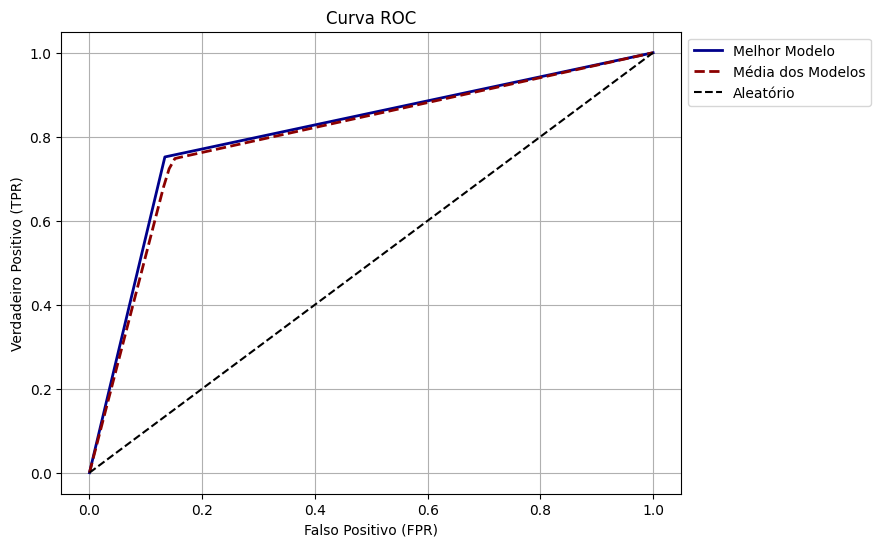

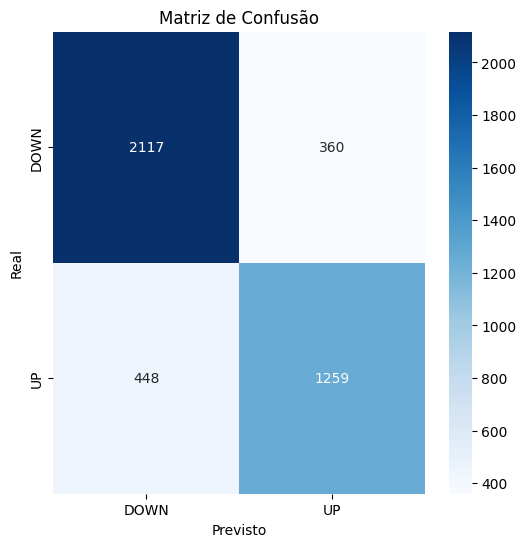

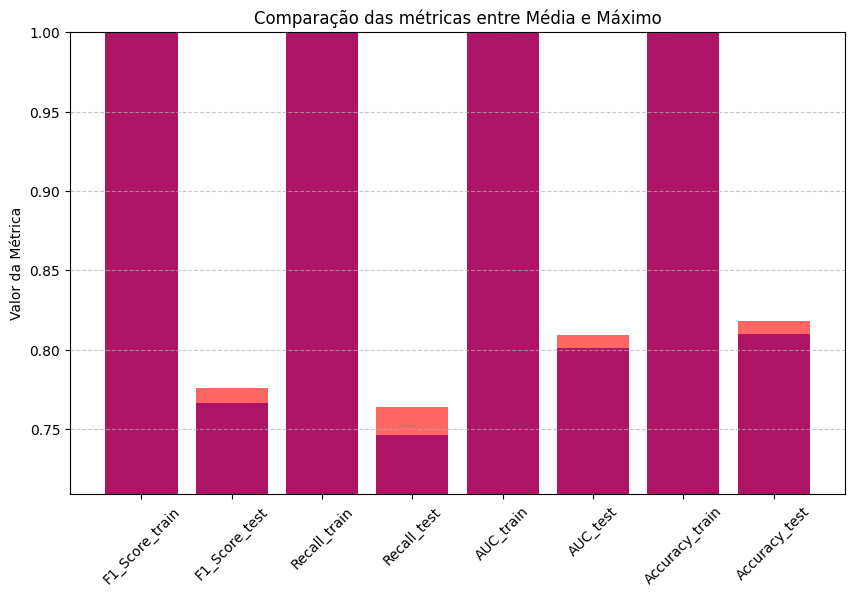

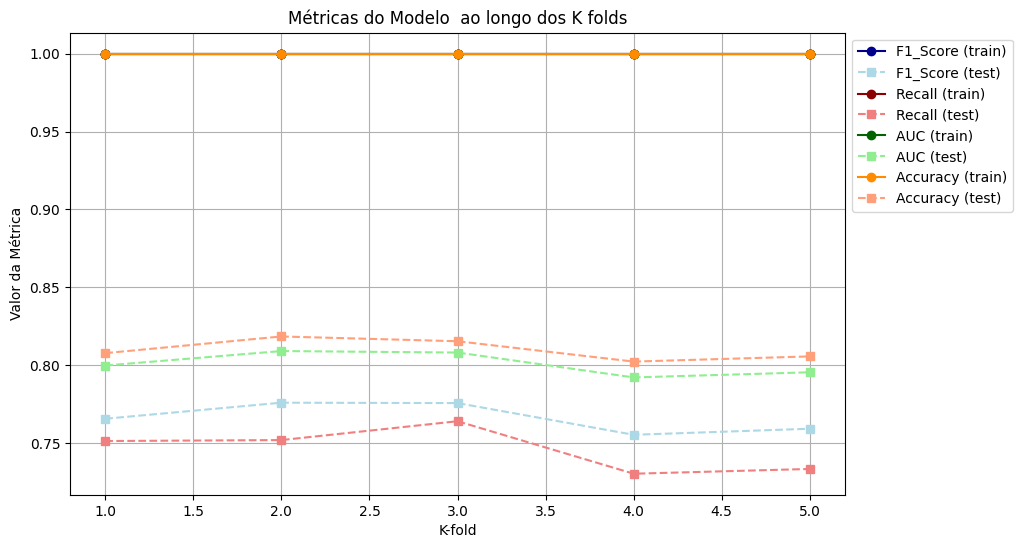

In [7]:
plots.show_roc(df_knn)
plots.show_confusion_matrix(model_knn, X_test, Y_test)
plots.show_bar_metrics(df_knn)
plots.show_metrics(df_knn)